![](https://raw.githubusercontent.com/Qinbf/tf-model-zoo/master/README_IMG/01.jpg)
AI MOOC： **www.ai-xlab.com**  
如果你也是AI爱好者，可以添加我的微信一起交流：**sdxxqbf**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

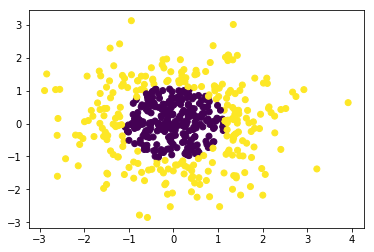

In [7]:
# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征
# 可以生成两类或多类数据
x_data, y_data = make_gaussian_quantiles(n_samples=500, n_features=2,n_classes=2)

plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

In [8]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)

E:\Pycharm IDE\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

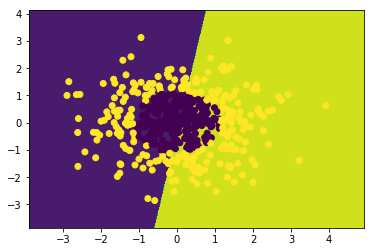

score: 0.552


In [9]:
# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# np.r_按row来组合array， 
# np.c_按colunm来组合array
# >>> a = np.array([1,2,3])
# >>> b = np.array([5,2,5])
# >>> np.r_[a,b]
# array([1, 2, 3, 5, 2, 5])
# >>> np.c_[a,b]
# array([[1, 5],
#        [2, 2],
#        [3, 5]])
# >>> np.c_[a,[0,0,0],b]
# array([[1, 0, 5],
#        [2, 0, 2],
#        [3, 0, 5]])
z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_data,y_data))

E:\Pycharm IDE\anaconda\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


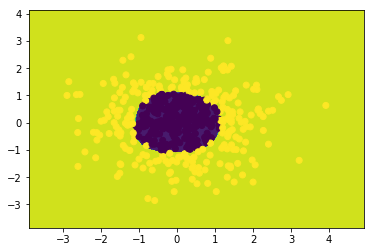

score: 0.986


In [10]:
# 定义多项式回归,degree的值可以调节多项式的特征
poly_reg  = PolynomialFeatures(degree=5) 
# 特征处理
x_poly = poly_reg.fit_transform(x_data)
# 定义逻辑回归模型
logistic = linear_model.LogisticRegression()
# 训练模型
logistic.fit(x_poly, y_data)

# 获取数据值所在的范围
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

# 生成网格矩阵
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# np.r_按row来组合array， 
# np.c_按colunm来组合array
# >>> a = np.array([1,2,3])
# >>> b = np.array([5,2,5])
# >>> np.r_[a,b]
# array([1, 2, 3, 5, 2, 5])
# >>> np.c_[a,b]
# array([[1, 5],
#        [2, 2],
#        [3, 5]])
# >>> np.c_[a,[0,0,0],b]
# array([[1, 0, 5],
#        [2, 0, 2],
#        [3, 0, 5]])
z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))# ravel与flatten类似，多维数据转一维。flatten不会改变原始数据，ravel会改变原始数据
z = z.reshape(xx.shape)
# 等高线图
cs = plt.contourf(xx, yy, z)
# 样本散点图
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)
plt.show()

print('score:',logistic.score(x_poly,y_data))